In [133]:
#MLP for numpy
import numpy as np
import matplotlib.pyplot as plt

In [134]:
#Generating dataset for regression
np.random.seed(0)
samples = 1000

In [135]:
#Features
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

In [136]:
#Combine the features into a NumPy array
Input = np.column_stack((x1, x2))

In [137]:
#Target
y = 2 * x1 + 3 * x2 - 1

In [138]:
#Layer Size
input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

In [139]:
#Bias & Parameter
W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

<br>
<center> Sigmoid Function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

<center> Differentiation of sigmoid function

$$\sigma(x)' = \sigma(x)(1-\sigma(x))$$

In [140]:
#Activation Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def diff_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [141]:
#Hyper Parameter
alpha = 0.01 #Learning Rate = 1e-2
epochs = 50

In [142]:
#Mean Square Error(MSE), Mean Absolute Percentage Error(MAPE)
MSE_list, MAPE_list = [], []

In [143]:
#ANN Algorithm
for epoch in range(epochs):
    MSE, MAPE = 0, 0
    for iter in range(samples):
        
        #Feedforward
        X = Input[iter]
        Z_tilde = W1@X.reshape(-1, 1) + b1.reshape(-1, 1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1, 1) + b2.reshape(-1, 1)
        
        #Calculating the error
        J = ((y_pred - y[iter]) ** 2) / 2
        MSE += J
        MAPE += np.abs((y_pred - y[iter])/y[iter]) * 100
        
        #Back propagation
        #Output Layer => Hidden Layer
        dJdy = (y_pred - y[iter])
        dJdW2_11 = dJdy * Z[0]
        dJdW2_12 = dJdy * Z[1]
        dJdW2_13 = dJdy * Z[2]
        dJdb2_1 = dJdy
        
        dJdZ1 = dJdy * W2[0, 0]
        dJdZ2 = dJdy * W2[0, 1]
        dJdZ3 = dJdy * W2[0, 2]
        
        #Hidden Layer => Input Layer
        dJdW1_11 = dJdZ1 * X[0] * diff_sigmoid(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * diff_sigmoid(Z_tilde[0])
        dJdb1_1 = dJdZ1 * diff_sigmoid(Z_tilde[0])
        
        dJdW1_21 = dJdZ2 * X[0] * diff_sigmoid(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * diff_sigmoid(Z_tilde[1])
        dJdb1_2 = dJdZ2 * diff_sigmoid(Z_tilde[1])
        
        dJdW1_31 = dJdZ3 * X[0] * diff_sigmoid(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * diff_sigmoid(Z_tilde[2])
        dJdb1_3 = dJdZ3 * diff_sigmoid(Z_tilde[2])
        
        #update
        #Input Layer => Hidden Layer Parameter
        W1[0][0] -= alpha * dJdW1_11
        W1[0][1] -= alpha * dJdW1_12
        
        W1[1][0] -= alpha * dJdW1_21
        W1[1][1] -= alpha * dJdW1_22
        
        W1[2][0] -= alpha * dJdW1_31
        W1[2][1] -= alpha * dJdW1_32
        
        b1[0] -= alpha * dJdb1_1
        b1[1] -= alpha * dJdb1_2
        b1[2] -= alpha * dJdb1_3
        
        #Hidden Layer => Output Layer Parameter
        W2[0][0] -= alpha * dJdW2_11
        W2[0][1] -= alpha * dJdW2_12
        W2[0][2] -= alpha * dJdW2_13
        b2[0] -= alpha * dJdb2_1
    
    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs - 1:
        print('MSE and MAPE at epoch', epoch, ' :',
              np.squeeze(MSE), ', ', np.squeeze(MAPE))

C:\Users\고정우\AppData\Local\Temp\ipykernel_11916\2464708194.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] -= alpha * dJdW1_11
C:\Users\고정우\AppData\Local\Temp\ipykernel_11916\2464708194.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] -= alpha * dJdW1_12
C:\Users\고정우\AppData\Local\Temp\ipykernel_11916\2464708194.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] -= alpha * dJdW1_21
C:\Users\고정우\AppData\Local\Temp\ipykernel_1191

MSE and MAPE at epoch 0  : 0.4923692081588331 ,  641.2237701880405
MSE and MAPE at epoch 5  : 0.022246601021031178 ,  107.66956507883876
MSE and MAPE at epoch 10  : 0.001093995028445833 ,  6.327061349178862
MSE and MAPE at epoch 15  : 0.0009431841058067324 ,  6.289273870287075
MSE and MAPE at epoch 20  : 0.0008794994777657892 ,  6.3635466025749325
MSE and MAPE at epoch 25  : 0.0008454180822275694 ,  6.422813654178087
MSE and MAPE at epoch 30  : 0.0008243076834218875 ,  6.466028368064787
MSE and MAPE at epoch 35  : 0.00080913002901405 ,  6.569256908978975
MSE and MAPE at epoch 40  : 0.0007967970084727246 ,  6.720565021532866
MSE and MAPE at epoch 45  : 0.0007859123333003971 ,  6.823595534615717
MSE and MAPE at epoch 49  : 0.0007777988486311397 ,  6.875034849438831


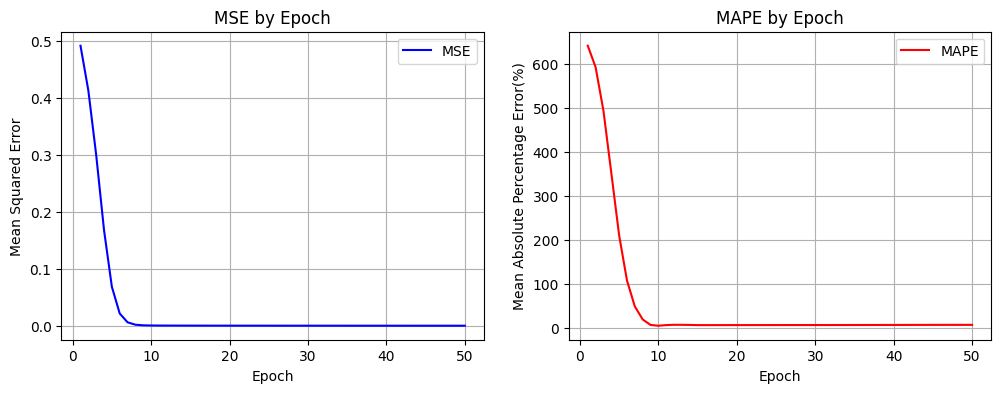

In [144]:
#시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("MSE by Epoch")
plt.plot(np.arange(1, epochs + 1), MSE_list, label = 'MSE', linewidth = 1.5, color = 'b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("MAPE by Epoch")
plt.plot(np.arange(1, epochs + 1), MAPE_list, label = 'MAPE', linewidth = 1.5, color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Percentage Error(%)')
plt.legend()
plt.grid()

Keras를 이용한 MLP

In [145]:
# MLP for Keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras import utils


In [146]:
tf.config.run_functions_eagerly(True)

#Generating dataset for regression
np.random.seed(0)
num_samples = 1000

# Features: Three independent variables
x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)

# Combine the features into a NumPy array
Input = np.column_stack((x1, x2))

# Target: A linear combination of the features
y = 2 * x1 + 3 * x2 - 1

# Define the model
model = Sequential([
    Dense(3, input_dim=2, activation='sigmoid'),  # Hidden layer with 3 neurons
    Dense(1, activation='linear')  # Output layer with 1 neuron
])

# Compile the model with Stochastic Gradient Descent (SGD) optimizer
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsolutePercentageError()],
              run_eagerly=True)

# Batch size를 10으로 설정
# Batch size가 작으면 시간이 오래 걸리기 때문에 10으로 설정정
epochs = 50
history = model.fit(Input, y, epochs=epochs, batch_size=10)

# Evaluate the model on the training set
evaluation_metrics = model.evaluate(Input, y)
print("Mean Loss on Training Data:", evaluation_metrics[0])
print("Mean Squared Error on Training Data:", evaluation_metrics[1])
print("Mean Absolute Percentage Error on Training Data:", evaluation_metrics[2])

# Summary of the model
model.summary()

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.2372 - mean_absolute_percentage_error: 688.8145 - mean_squared_error: 1.2372
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.7087 - mean_absolute_percentage_error: 991.6386 - mean_squared_error: 0.7087 
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2434 - mean_absolute_percentage_error: 175.6871 - mean_squared_error: 0.2434
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0323 - mean_absolute_percentage_error: 117.2767 - mean_squared_error: 0.0323
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0067 - mean_absolute_percentage_error: 19.9873 - mean_squared_error: 0.0067
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0040 - mean_absolute_percentage_error: 6.6275 - mean_squared_error: 0.0040
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0036 - mean_absolute_percentage_error: 8.5505 - mean_squared_error: 0.0036
Epoch 8/50
100/100 ━━━━━

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

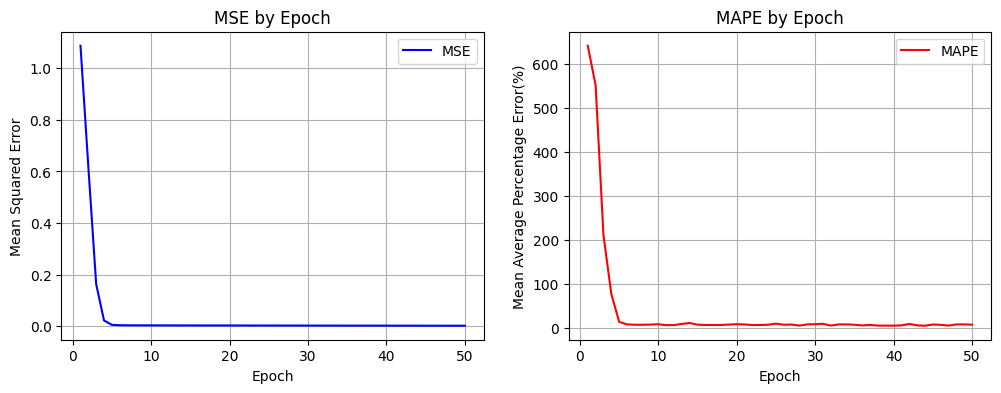

In [148]:
# 시각화화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("MSE by Epoch")
plt.plot(np.arange(1,epochs+1), history.history['mean_squared_error'], label='MSE', linewidth=1.5, color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("MAPE by Epoch")
plt.plot(np.arange(1, epochs + 1), history.history['mean_absolute_percentage_error'], label = 'MAPE', linewidth=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean Average Percentage Error(%)')
plt.legend()
plt.grid(True)
plt.show()